In [1]:
## http://tiny.cc/MLR


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [7]:
# loading the boston data set
from sklearn.datasets import load_boston
boston=load_boston()

In [10]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df['MEDV']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
### to find the correlation we can use corr()
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


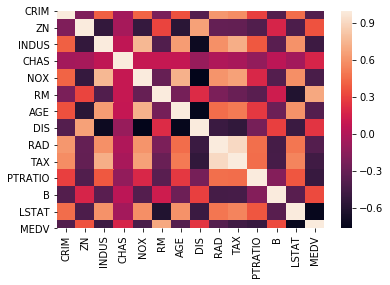

In [18]:
## visualizing the corelation 
sns.heatmap(boston_df.corr())

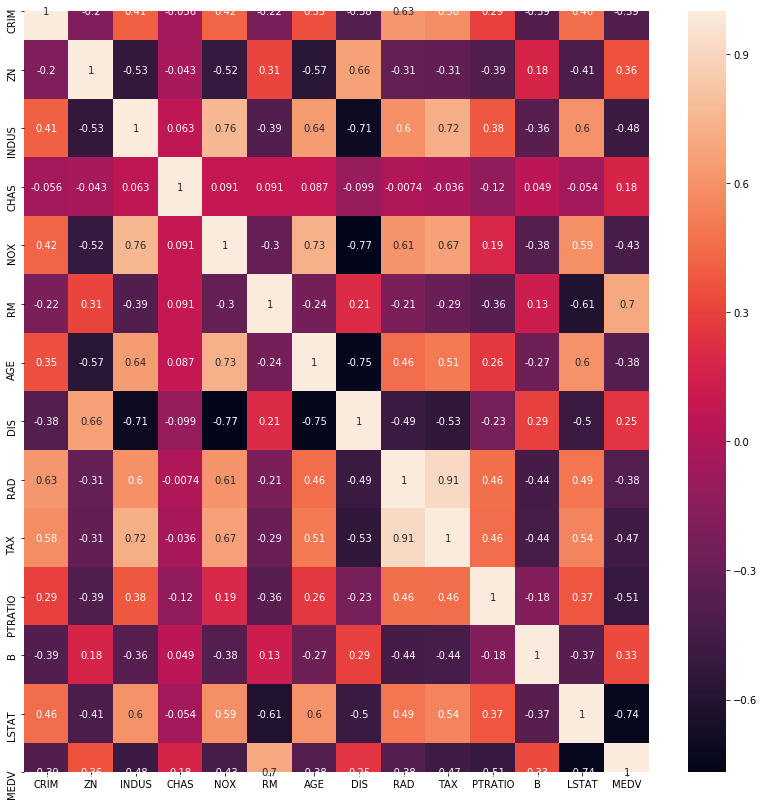

In [20]:
plt.figure(figsize=(14,14))
sns.heatmap(boston_df.corr(),annot=True)

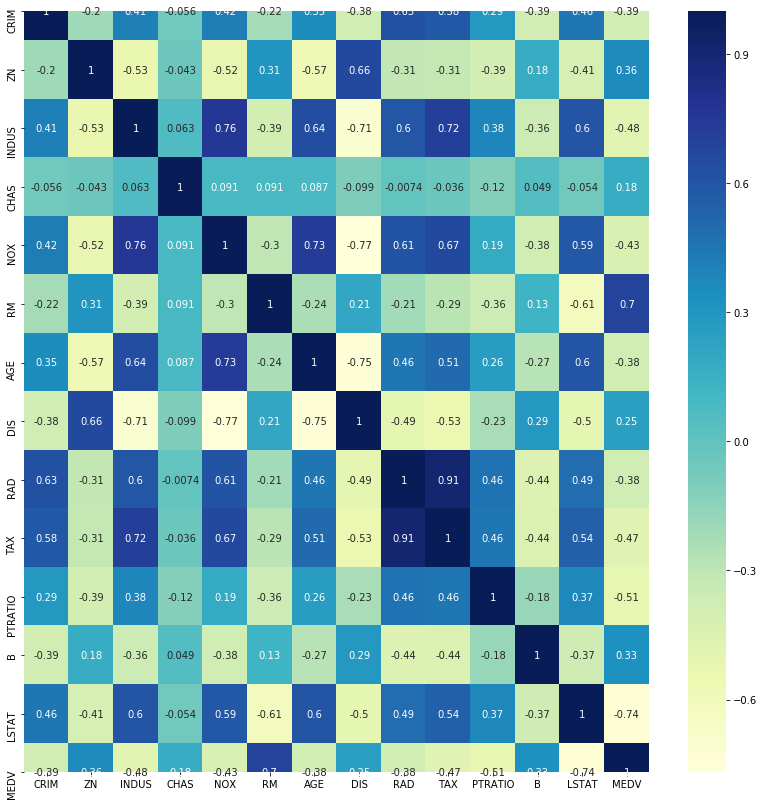

In [22]:
plt.figure(figsize=(14,14))
sns.heatmap(boston_df.corr(),annot=True,cmap='YlGnBu')

In [27]:
## correlation >0.7
correlation=boston_df.corr()
cor=correlation>0.7
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,False,False,False,True,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,True,False,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,False
AGE,False,False,False,False,True,False,True,False,False,False,False,False,False,False
DIS,False,False,False,False,False,False,False,True,False,False,False,False,False,False
RAD,False,False,False,False,False,False,False,False,True,True,False,False,False,False
TAX,False,False,True,False,False,False,False,False,True,True,False,False,False,False


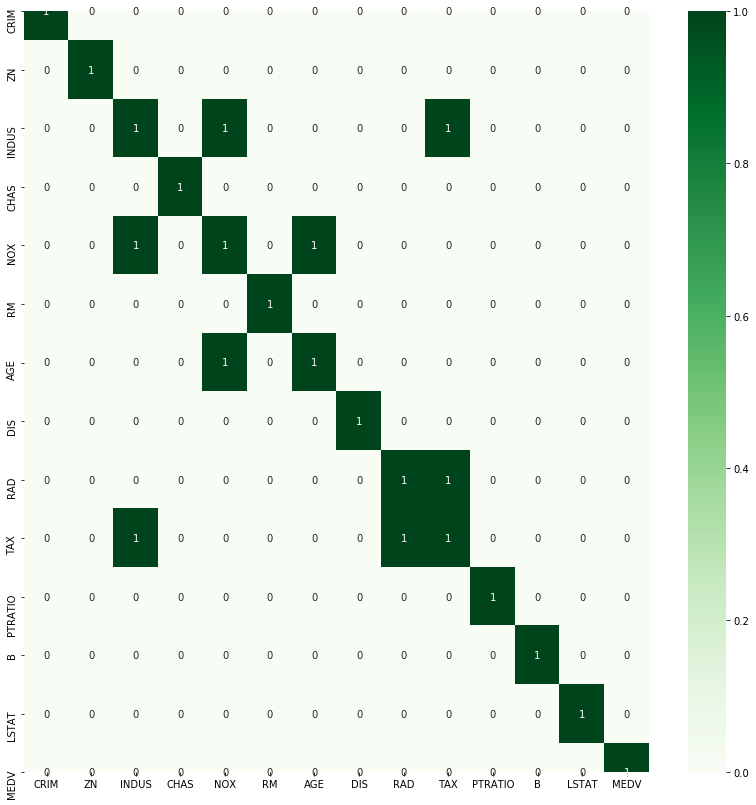

In [32]:
## correlation >0.7
correlation=boston_df.corr()
cor=correlation>0.7
plt.figure(figsize=(14,14))
sns.heatmap(cor,cmap='Greens',annot=True)

In [35]:
## checking the corelation between 0.7 and 0.9
cor=correlation[(correlation>0.7)&(correalation<0.9)]
cor

NameError: name 'correalation' is not defined

In [36]:
## all the columns -- as inpiut
## drop the columns whih are highly correlated and build as MLR:you need to compare  the performance

In [37]:
## split the data into training and esting ,Bulod the model on training data and test the model on testing data

In [43]:
## split the data into Input And Output 
X=boston_df.drop('MEDV',axis=1)
y=boston_df.MEDV

In [45]:
# divide the X and y into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [48]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [52]:
#build the mode on the training data-->X_train and y_train
## sklearn library :impport ,instantiate,fit
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
##Intercept and the coefficient values
print(lm.intercept_)
lm.coef_

36.93325545711978


array([-1.17735289e-01,  4.40174969e-02, -5.76814314e-03,  2.39341594e+00,
       -1.55894211e+01,  3.76896770e+00, -7.03517828e-03, -1.43495641e+00,
        2.40081086e-01, -1.12972810e-02, -9.85546732e-01,  8.44443453e-03,
       -4.99116797e-01])

In [56]:
## create a dataframe for coefficients
coefficients=pd.DataFrame([X_train.columns,lm.coef_])
coefficients

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,-0.117735,0.0440175,-0.00576814,2.39342,-15.5894,3.76897,-0.00703518,-1.43496,0.240081,-0.0112973,-0.985547,0.00844443,-0.499117


In [57]:
## create a dataframe for coefficients
coefficients=pd.DataFrame([X_train.columns,lm.coef_]).T
coefficients

,0,1
0,CRIM,-0.117735
1,ZN,0.0440175
2,INDUS,-0.00576814
3,CHAS,2.39342
4,NOX,-15.5894
5,RM,3.76897
6,AGE,-0.00703518
7,DIS,-1.43496
8,RAD,0.240081
9,TAX,-0.0112973


In [58]:
# y=b0+b1x1+b2x2+........b13x13
#y=36.93325545711978+(-0.117735)()

In [60]:
## checking the model performance on training data
y_train_pred=lm.predict(X_train)
y_train_pred

array([13.54334096, 21.03611757, 35.25707372, 19.31180705, 12.9193462 ,
       13.83454251, 22.66868871, 14.2409856 , 31.24023391, 25.2746277 ,
       15.13346462, 24.27169368,  9.08842615, 14.82179159, 21.01155502,
       32.97485525, 27.96169238, 25.76241079, 15.56154982, 31.08187689,
       28.10293564, 13.79628381,  7.39293584, 28.48119204, 25.40996121,
        4.34170732, 28.48040075, 17.16788093, 29.49717483, 20.3114614 ,
       15.95499192, 17.81088079, 12.68905582,  8.44914207, 19.28629969,
       34.45678405, 32.9718556 , 23.57990095, 19.63359906, 22.95623269,
       26.85871334, 21.77624643, 16.93785832, 32.00415847, 10.62790654,
       19.32739398, 32.23307479, 18.75153571, 15.81064522, 18.67130015,
       14.4104764 , 24.58123176, 24.07953473, 16.49458446, 13.19945057,
       20.38069625, 24.75377888, 17.22571167, 24.97600846, 22.55118033,
       27.83912426, 35.9434255 , 16.45240418, 11.58522008, 34.68756396,
       31.00776222, 20.65966773, 39.55056576, 29.0078266 , 29.00

In [61]:
## we neeed to compare the actual values (y_train) and  the  predictd # values(y_trsin_pred)

from sklearn.metrics import r2_score
print('R^2',r2_score(y_train,y_train_pred))

R^2 0.7697699488741149


In [67]:
print('Adjusted R^2:'1-(1-r2_score(y_train,y_train_pred))*(len(X_train)-1)/
                                          (len(X_train)-X_train.shape[1]-1))

SyntaxError: invalid syntax (<ipython-input-67-64c891991435>, line 1)

In [68]:
from sklearn.metrics import r2_score
print('R^2:', r2_score(y_train,y_train_pred))
print('Adjusted R^2:', 1- (1-r2_score(y_train, y_train_pred))*(len(X_train)-1)/
                                  (len(X_train)-X_train.shape[1]-1))


R^2: 0.7697699488741149
Adjusted R^2: 0.7615699744504532


In [84]:
print('MAE',mean_absolute_error(y_train,y_train_pred))
print('MSE',mean_squared_error(y_train,y_train_pred))

print('RMSE',np.sqrt(mean_squared_error(y_train,y_train_pred)))


MAE 3.1039668582990787
MSE 19.640519427908043
RMSE 4.431762564477935


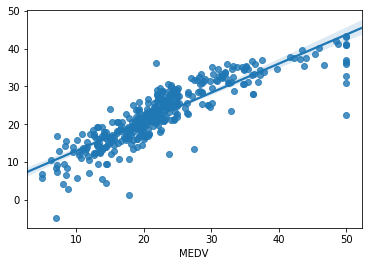

In [69]:
sns.regplot(y_train,y_train_pred)

Text(0, 0.5, 'model predicted price')

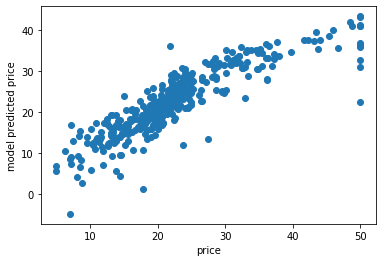

In [70]:
## visualize the difference between actual values and predicted values
plt.scatter(y_train,y_train_pred)
plt.xlabel('price')
plt.ylabel('model predicted price')

Text(0, 0.5, 'residuals')

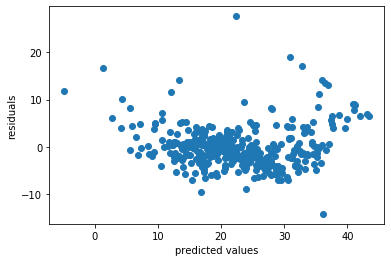

In [74]:
## y_train-y_train_pred==errors
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.xlabel("predicted values")
plt.ylabel("residuals")

In [76]:
## test the model on testing data
y_test_pred=lm.predict(X_test)## test data -->unseen data
y_test_pred

array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042,
       19.46954895, 20.42228421, 21.52044058, 18.98954101, 19.950983  ,
        4.92468244, 16.09694058, 16.93599574,  5.33508402, 39.84434398,
       32.33549843, 22.32772572, 36.54017819, 31.03300611, 23.32172503,
       24.92086498, 24.26106474, 20.71504422, 30.45072552, 22.45009234,
        9.87470006, 17.70324412, 17.974775  , 35.69932012, 20.7940972 ,
       18.10554174, 17.68317865, 19.71354713, 23.79693873, 29.06528958,
       19.23738284, 10.97815878, 24.56199978, 17.32913052, 15.20340817,
       26.09337458, 20.87706795, 22.26187518, 15.32582693, 22.85847963,
       25.08887173, 19.74138819, 22.70744911,  9.66708558, 24.46175926,
       20.72654169, 17.52545047, 24.45596997, 30.10668865, 13.31250981,
       21.52052342, 20.65642932, 15.34285652, 13.7741129 , 22.07429287,
       17.53293957, 21.60707766, 32.91050188, 31.32796114, 17.64346364,
       32.69909854, 18.56579207, 19.32110821, 18.81256692, 23.04

In [79]:
## we need to comare the actual values(y_test) and the predicted # values(y_test_pred)
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
print('R^2:', r2_score(y_test,y_test_pred))
print('Adjusted R^2:', 1- (1-r2_score(y_test, y_test_pred))*(len(X_test)-1)/
                                  (len(X_test)-X_test.shape[1]-1))

R^2: 0.6354638433202124
Adjusted R^2: 0.5935260553835997


In [83]:
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE',mean_squared_error(y_test,y_test_pred))

print('RMSE',np.sqrt(mean_squared_error(y_test,y_test_pred)))


MAE 3.668330148135727
MSE 29.7822450923024
RMSE 5.457311159564058
